In [1]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas_profiling
import nltk
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sb
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings("ignore")
import unidecode
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.stem import PorterStemmer
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import matplotlib.animation as animation
import operator
import plotly.express as px
from collections import Counter
%matplotlib inline

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
df = pd.read_csv('train.csv')

In [10]:
df.head()

id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation

In [11]:
pandas_profiling.ProfileReport(df)

In [12]:
df.shape

(31962, 3)

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
#removing @
df['clean_tweet'] = df['tweet'].apply(lambda x : ' '.join([tweet for tweet in x.split()if not tweet.startswith("@")]))

In [15]:
df.head()

id  label                                              tweet  \
0   1      0   @user when a father is dysfunctional and is s...   
1   2      0  @user @user thanks for #lyft credit i can't us...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                         clean_tweet  
0  when a father is dysfunctional and is so selfi...  
1  thanks for #lyft credit i can't use cause they...  
2                                bihday your majesty  
3  #model i love u take with u all the time in ur...  
4                factsguide: society now #motivation

In [16]:
#removing numbers
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join([tweet for tweet in x.split() if not tweet == '\d*']))

In [17]:
#Removing all the greek characters using unidecode library
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join([unidecode.unidecode(word) for word in x.split()]))

In [19]:
#Finding words with # attached to it
df['#'] = df['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if word.startswith('#')]))
df.head()

id  label                                              tweet  \
0   1      0   @user when a father is dysfunctional and is s...   
1   2      0  @user @user thanks for #lyft credit i can't us...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                         clean_tweet  \
0  when a father is dysfunctional and is so selfi...   
1  thanks for #lyft credit i can't use cause they...   
2                                bihday your majesty   
3  #model i love u take with u all the time in ur...   
4                factsguide: society now #motivation   

                                #  
0                            #run  
1  #lyft #disapointed #getthanked  
2                                  
3                          #model  
4                     #motivation

In [27]:
frame = df['#']


In [28]:
frame = pd.DataFrame(frame)
frame = frame.rename({'#':'Hash words'},axis = 'columns')
frame.head()


Hash words
0                            #run
1  #lyft #disapointed #getthanked
2                                
3                          #model
4                     #motivation

In [29]:
frame[frame['Hash words'] == ''] = 'No hashtags'
frame.head()

Hash words
0                            #run
1  #lyft #disapointed #getthanked
2                     No hashtags
3                          #model
4                     #motivation

In [30]:
data_frame = pd.concat([df,frame],axis = 1)

In [33]:
#Removing stopwords
data_frame['clean_tweet'] = data_frame['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if not word in set(stopwords.words('english'))]))

In [35]:
data_frame.drop('#',axis = 1,inplace = True)
data_frame.head()

id  label                                              tweet  \
0   1      0   @user when a father is dysfunctional and is s...   
1   2      0  @user @user thanks for #lyft credit i can't us...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                         clean_tweet  \
0  father dysfunctional selfish drags kids dysfun...   
1  thanks #lyft credit can't use cause offer whee...   
2                                     bihday majesty   
3     #model love u take u time urd+-!!! dddd d|d|d|   
4                    factsguide: society #motivation   

                       Hash words  
0                            #run  
1  #lyft #disapointed #getthanked  
2                     No hashtags  
3                          #model  
4                     #motivation

In [36]:
#Lemmitization
lemmatizer = WordNetLemmatizer()
data_frame['clean_tweet'] = data_frame['clean_tweet'].apply(lambda x : ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [37]:
#Stemming
ps = PorterStemmer()
adwait = data_frame
#adwait.head()
data_frame['clean_tweet'] = data_frame['clean_tweet'].apply(lambda x : ' '.join([ps.stem(word) for word in x.split()]))

In [38]:
#Tokenization
corpus = []
for i in range(0,31962):
    tweet = data_frame['clean_tweet'][i]
    tweet = tweet.lower()
    tweet = tweet.split()
    tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    corpus.append(tweet)

In [39]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


Normal words


(-0.5, 799.5, 499.5, -0.5)

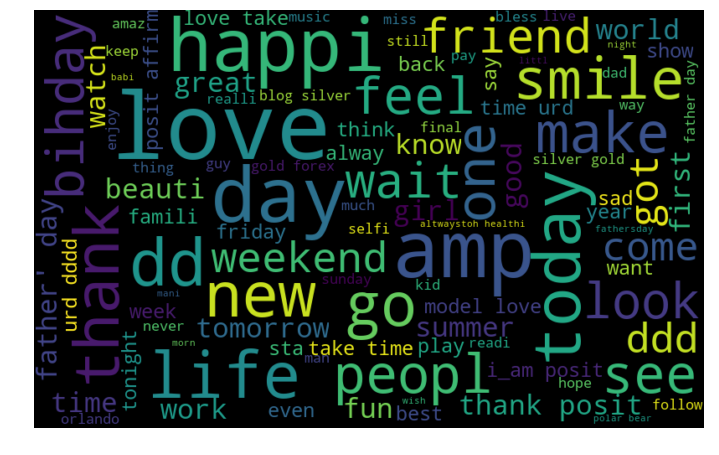

In [40]:
normal_words = ' '.join([word for word in data_frame['clean_tweet'][data_frame['label'] == 0]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 100).generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

Normal words


(-0.5, 799.5, 499.5, -0.5)

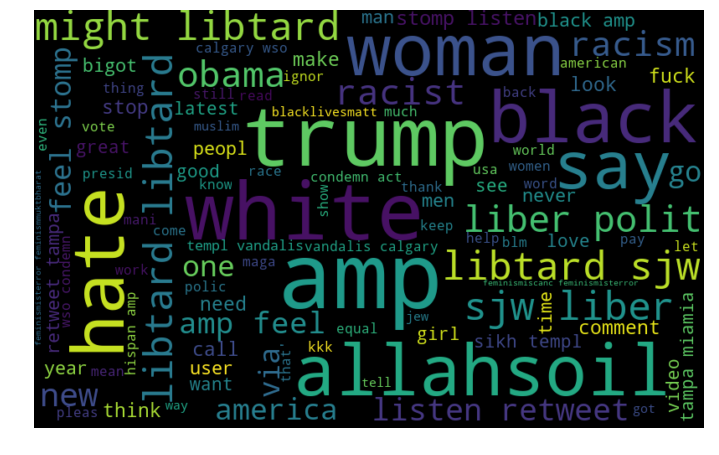

In [41]:
normal_words = ' '.join([word for word in data_frame['clean_tweet'][data_frame['label'] == 1]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 100).generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

In [42]:
#Collecting positive hashtags

hash_positive = []
hash_negative = []

In [43]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [44]:
hash_positive = hashtag_extract(data_frame['clean_tweet'][data_frame['label'] == 0])

# extracting hashtags from racist/sexist tweets
hash_negative = hashtag_extract(data_frame['clean_tweet'][data_frame['label'] == 1])

# Converting a multidimensional list to a 1-D list
hash_positive = sum(hash_positive,[])
hash_negative = sum(hash_negative,[])

In [45]:
q = Counter(hash_positive)
q = dict(q.most_common())

In [46]:
l_positive_count = list(q.values())
l_positive_count[0:4]

[1579, 905, 636, 558]

In [47]:
r = Counter(hash_negative)
r = dict(r.most_common())
l_negative_count = list(r.values())
l_negative_count[0:4]

[133, 94, 92, 79]

In [48]:
l_positive_values = list(q.keys())
l_positive_values[0:4]

['love', 'posit', 'smile', 'healthi']

In [49]:
l_negative_values = list(r.keys())
l_negative_values[0:4]

['trump', 'polit', 'allahsoil', 'liber']

In [50]:
#Creating a dataframe to represent top 20 positive and negative hash words
l1 = pd.DataFrame(l_positive_values[0:20],columns = ['Positive_Words'])
l2 = pd.DataFrame(l_positive_count[0:20],columns = ['Positive_Count'])
l3 = pd.DataFrame(l_negative_values[0:20],columns = ['Negative_Words'])
l4 = pd.DataFrame(l_negative_count[0:20],columns = ['Negative_Count'])
z = pd.concat([l1,l2,l3,l4],axis = 1)
z

Positive_Words  Positive_Count Negative_Words  Negative_Count
0            love            1579          trump             133
1           posit             905          polit              94
2           smile             636      allahsoil              92
3         healthi             558          liber              79
4           thank             526        libtard              77
5             fun             434            sjw              75
6          affirm             422        retweet              57
7            life             399          black              46
8           model             374         miamia              38
9          summer             361           hate              36
10           blog             355          bigot              35
11           cute             355          tampa              32
12           i_am             352          obama              31
13         beauti             347            blm              28
14     fathersday             332         hispan              28
15             me             331         brexit              27
16          happi             328           sikh              27
17         friend             319          templ              26
18         silver             299        calgary              26
19           gold             298            wso              26

In [51]:
fig = px.bar(z, x="Positive_Words", y="Positive_Count",animation_frame="Positive_Count",
            hover_name="Positive_Words")
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1200
fig.show()

In [52]:
fig = px.bar(z, x="Negative_Words", y="Negative_Count",animation_frame="Negative_Count",
            hover_name="Negative_Words")
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1200
fig.show()

In [53]:

#Normal histogram of positive words
fig = px.bar(z, x="Positive_Words", y="Positive_Count",
            hover_name="Positive_Words",color = 'Positive_Count')
fig.show()

In [54]:
#Normal histogram of negative words
fig = px.bar(z, x="Negative_Words", y="Negative_Count",
            hover_name="Negative_Words",color= 'Negative_Count')
fig.show()

In [55]:

#Techniques to convert the tweets into Bag-of-Words, TF-IDF, and Word Embeddings
#Building various classifiers: -
#TF-IDF approach
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2,stop_words='english')
# TF-IDF feature matrix
X1 = tfidf_vectorizer.fit_transform(corpus).toarray()
Y1 = df.loc[:,'label'].values

In [56]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(data_frame['clean_tweet'], data_frame['label'], test_size = 0.3, random_state=0, shuffle = True, stratify=data_frame['label'])
vectorizer = TfidfVectorizer()
X1_train_vect = vectorizer.fit_transform(X1_train)
Y1 = df.loc[:,'label'].values

In [57]:
#Random Forest using pipelines
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
rf = Pipeline([('tfidf', TfidfVectorizer()), ('rf', RandomForestClassifier())])
rf.fit(X1_train, Y1_train)
y_pred = rf.predict(X1_test)
print(pd.crosstab(Y1_test,y_pred,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(Y1_test, y_pred))

Predicted     0    1
Actual              
0          8876   40
1           356  317
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8916
           1       0.89      0.47      0.62       673

   micro avg       0.96      0.96      0.96      9589
   macro avg       0.92      0.73      0.80      9589
weighted avg       0.96      0.96      0.95      9589



In [58]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()
dense = X.todense()
denselist = dense.tolist()
df2 = pd.DataFrame(denselist, columns=feature_names)
df2

MemoryError: 

In [60]:
data_frame.head()

id  label                                              tweet  \
0   1      0   @user when a father is dysfunctional and is s...   
1   2      0  @user @user thanks for #lyft credit i can't us...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                         clean_tweet  \
0  father dysfunct selfish drag kid dysfunction. ...   
1  thank #lyft credit can't use caus offer wheelc...   
2                                     bihday majesti   
3     #model love u take u time urd+-!!! dddd d|d|d|   
4                         factsguide: societi #motiv   

                       Hash words  
0                            #run  
1  #lyft #disapointed #getthanked  
2                     No hashtags  
3                          #model  
4                     #motivation

In [67]:
df = data_frame.drop(columns='Hash words')
df = df.drop(columns='tweet')
df.head()

id  label                                        clean_tweet
0   1      0  father dysfunct selfish drag kid dysfunction. ...
1   2      0  thank #lyft credit can't use caus offer wheelc...
2   3      0                                     bihday majesti
3   4      0     #model love u take u time urd+-!!! dddd d|d|d|
4   5      0                         factsguide: societi #motiv

In [70]:
dff = df.drop(['label'], axis = 1)

In [71]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(dff, list(df.label), test_size=0.1)

In [72]:
X_test.shape

(3197, 2)

In [73]:
X_temp['label'] = y_temp
X_temp.head()

id                                        clean_tweet  label
5065    5066  kinda accept fact think unlov person.. #hopele...      0
20507  20508  make mistake, u civil war hand ever hope preve...      0
31236  31237  give everi reason #th best father sinc 14 fath...      0
4272    4273  upon time #drive #up #love #freedom #concentr ...      0
5737    5738  no, google, *not* want see video highlight gsw...      0

In [74]:
nonhate = X_temp[X_temp['label'] == 0]

In [75]:
hate = X_temp[X_temp.label == 1]

In [77]:
nonhatesample = nonhate.sample(n = hate.shape[0])

In [78]:
ds = pd.concat([hate, nonhatesample], axis = 0)

In [79]:
ds.to_csv("C:/Users/dell/Desktop/SEM 6/NLP/trainset.csv")

In [81]:
ds = pd.read_csv("C:/Users/dell/Desktop/SEM 6/NLP/trainset.csv")

In [82]:
ds_temp = ds
testdf = X_test
testdf['label'] = y_test
ds = pd.concat([ds_temp, testdf], axis = 0)
ds.head()

Unnamed: 0                                        clean_tweet     id  label
0     13229.0  al capon jail tax evasion, murder committed. '...  13230      1
1      7996.0            striker leagu wouldnt disallowd #munmid   7997      1
2      2904.0                             girl get fuck leg fuck   2905      1
3     22657.0    call #carlpaladino step know spew consequences!  22658      1
4      4558.0  dear politician &amp; medium jind insid matter...   4559      1

In [89]:
corpus = []
for i in range(ds.shape[0]):
    corpus.append(ds.iloc[i][1])

In [90]:
corpus

["al capon jail tax evasion, murder committed. 's achil heel? #unpresid #nohat",
 'striker leagu wouldnt disallowd #munmid',
 'girl get fuck leg fuck',
 'call #carlpaladino step know spew consequences!',
 'dear politician &amp; medium jind insid matter #humanright &amp; safeti woman india',
 'felt lawrenc fishburn ad "magic negro" hollywood stereotyp made of!',
 '#feminismiscanc #feminismisterror #feminismmuktbharat #malevot ignor',
 'kevin macdonald: ethnocentr normal ration #race #ethnocentr #altright #pegida',
 'jonjo shelvey = man ever racial abus someon without say anything! #kickitout #shelvey',
 '2017 wonder year crave #authoritarian hand',
 'serious lede. come on, better.',
 'countri argu differ shade black! d" d!',
 '#prais #cleveland polic #rnc polic consent decree! 75% #white #tamirric #rip',
 'oops! #carlpaladino mean publicli post comments... via',
 'genealog #xenophobia #papalbul #colonis #slaveri #enlighten #polygeni #pseudosci',
 'playground insult alway reflect famili 

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [92]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()
dense = X.todense()
denselist = dense.tolist()
df2 = pd.DataFrame(denselist, columns=feature_names)
df2

00  000  0099  00am   01   03  030916  039   05   06  ...  zoomi  \
0     0.0  0.0   0.0   0.0  0.0  0.0     0.0  0.0  0.0  0.0  ...    0.0   
1     0.0  0.0   0.0   0.0  0.0  0.0     0.0  0.0  0.0  0.0  ...    0.0   
2     0.0  0.0   0.0   0.0  0.0  0.0     0.0  0.0  0.0  0.0  ...    0.0   
3     0.0  0.0   0.0   0.0  0.0  0.0     0.0  0.0  0.0  0.0  ...    0.0   
4     0.0  0.0   0.0   0.0  0.0  0.0     0.0  0.0  0.0  0.0  ...    0.0   
...   ...  ...   ...   ...  ...  ...     ...  ...  ...  ...  ...    ...   
7234  0.0  0.0   0.0   0.0  0.0  0.0     0.0  0.0  0.0  0.0  ...    0.0   
7235  0.0  0.0   0.0   0.0  0.0  0.0     0.0  0.0  0.0  0.0  ...    0.0   
7236  0.0  0.0   0.0   0.0  0.0  0.0     0.0  0.0  0.0  0.0  ...    0.0   
7237  0.0  0.0   0.0   0.0  0.0  0.0     0.0  0.0  0.0  0.0  ...    0.0   
7238  0.0  0.0   0.0   0.0  0.0  0.0     0.0  0.0  0.0  0.0  ...    0.0   

      zoomzoom  zoro  zshq  zucchini  zuma  zumba  zurich  zuricha  zzz  
0          0.0   0.0   0.0       0.0   0.0    0.0     0.0      0.0  0.0  
1          0.0   0.0   0.0       0.0   0.0    0.0     0.0      0.0  0.0  
2          0.0   0.0   0.0       0.0   0.0    0.0     0.0      0.0  0.0  
3          0.0   0.0   0.0       0.0   0.0    0.0     0.0      0.0  0.0  
4          0.0   0.0   0.0       0.0   0.0    0.0     0.0      0.0  0.0  
...        ...   ...   ...       ...   ...    ...     ...      ...  ...  
7234       0.0   0.0   0.0       0.0   0.0    0.0     0.0      0.0  0.0  
7235       0.0   0.0   0.0       0.0   0.0    0.0     0.0      0.0  0.0  
7236       0.0   0.0   0.0       0.0   0.0    0.0     0.0      0.0  0.0  
7237       0.0   0.0   0.0       0.0   0.0    0.0     0.0      0.0  0.0  
7238       0.0   0.0   0.0       0.0   0.0    0.0     0.0      0.0  0.0  

[7239 rows x 14470 columns]

In [95]:
tdf = df2
tdf['labelxyz'] = list(ds.label)
tdf_hate = tdf[tdf.labelxyz == 1]
tdf_nonhate = tdf[tdf.labelxyz == 0]
X_train_hate = tdf_hate.sample(frac=0.9, random_state=0)
X_test_hate = tdf_hate.drop(X_train_hate.index)
X_train_nonhate =  tdf_nonhate.sample(frac=0.406, random_state=0)
X_test_nonhate = tdf_nonhate.drop(X_train_nonhate.index)
X_train_df = pd.concat([X_train_hate, X_train_nonhate], axis = 0)
X_train = X_train_df.drop(['labelxyz'], axis = 1)
y_train = list(X_train_df.labelxyz)
X_test_df = pd.concat([X_test_hate, X_test_nonhate], axis = 0)
X_test = X_test_df.drop(['labelxyz'], axis = 1)
y_test = list(X_test_df.labelxyz)

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [98]:
# Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train, y_train, cv=3)
log_reg_mean = log_scores.mean()


# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=3)
nav_mean = nav_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'Naives Bayes'], 
    'Crossval Mean Scores': [log_reg_mean, nav_mean]}

result_df = pd.DataFrame(data=d)
result_df

Classifiers  Crossval Mean Scores
0  Logistic Reg.              0.860388
1   Naives Bayes              0.741537

In [120]:
from sklearn.metrics import accuracy_score
nav_clf = GaussianNB()
nav_clf.fit(X_train, y_train)
predict_nav = nav_clf.predict(X_test)
nb_val = accuracy_score(y_test, predict_nav)
nb_val

0.6265664160401002

In [100]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict_nav)

array([[1801, 1167],
       [  25,  199]], dtype=int64)

In [119]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
predict_log = log_reg.predict(X_test)
lr_val = accuracy_score(y_test, predict_log)
lr_val

0.8975563909774437

In [102]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict_log)

array([[2674,  294],
       [  33,  191]], dtype=int64)

In [103]:
log_reg.fit(X_train, y_train)
#predict_log = log_reg.predict(X_test, threshold = 0.4)
decisions = (log_reg.predict_proba(X_test) >= 0.5).astype(int)
#accuracy_score(y_test, predict_log)

In [104]:
tp = []
tn = []
overall_acc = []
for i in range(100):
    threshold = (i+1)/100
    decisions = (log_reg.predict_proba(X_test) >= threshold).astype(int)
    p = []
    for j in range(len(y_test)):
        p.append(1 - decisions[j][0])
    conf = confusion_matrix(y_test,p)
    tp.append(conf[0][0]/(conf[0][0] + conf[0][1]))
    tn.append(conf[1][1]/(conf[1][1] + conf[1][0]))
    overall_acc.append((conf[0][0] + conf[1][1])/len(y_test))

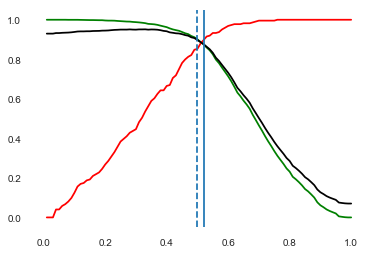

In [105]:
import numpy as np
thresh = list(np.linspace(0.01,1,100))
plt.plot(thresh,tp,color='green')
plt.plot(thresh, tn, color='red')
plt.plot(thresh, overall_acc, color='black')
plt.axvline(0.52)
plt.axvline(0.5, linestyle='dashed')

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
rand_clf = RandomForestClassifier()
rand_clf.fit(X_train, y_train)
predict = rand_clf.predict(X_test)
rf_val = accuracy_score(y_test, predict)
rf_val

0.9022556390977443

In [108]:
confusion_matrix(y_test, predict)

array([[2733,  235],
       [  51,  173]], dtype=int64)

In [117]:
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
predict_dt = dt_clf.predict(X_test)
dt_val = accuracy_score(y_test, predict_dt)
dt_val

0.8361528822055138

In [111]:
confusion_matrix(y_test, predict_dt)

array([[2472,  496],
       [  41,  183]], dtype=int64)

In [116]:
from sklearn.ensemble import GradientBoostingClassifier
grad_clf = GradientBoostingClassifier()
grad_clf.fit(X_train, y_train)
predict_grad = grad_clf.predict(X_test)
grad_val = accuracy_score(y_test, predict_grad)
grad_val

0.9116541353383458

In [113]:
confusion_matrix(y_test, predict_grad)

array([[2760,  208],
       [  80,  144]], dtype=int64)

In [114]:
decisions = (log_reg.predict_proba(X_test) >= 0.5).astype(int)
p = []
for j in range(len(y_test)):
    p.append(1 - decisions[j][0])

In [121]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

print('Logistic Regression Score: ', lr_val)
print('Naive Bayes Score: ', nb_val)
print('Random Forest Score: ', rf_val)
print('Decision Tree Score: ', dt_val)
print('Grad Boosting Score: ', grad_val)

Logistic Regression Score:  0.8975563909774437
Naive Bayes Score:  0.6265664160401002
Random Forest Score:  0.9022556390977443
Decision Tree Score:  0.8361528822055138
Grad Boosting Score:  0.9116541353383458


In [122]:
from sklearn.metrics import roc_curve

log_fpr, log_tpr, threshold = roc_curve(y_test,p)
nav_fpr, nav_tpr, threshold = roc_curve(y_test, predict_nav)
rand_fpr, rand_tpr, thresold = roc_curve(y_test, predict)
dt_fpr, dt_tpr, threshold = roc_curve(y_test, predict_dt)
grad_fpr, grad_tpr, threshold = roc_curve(y_test, predict_grad)

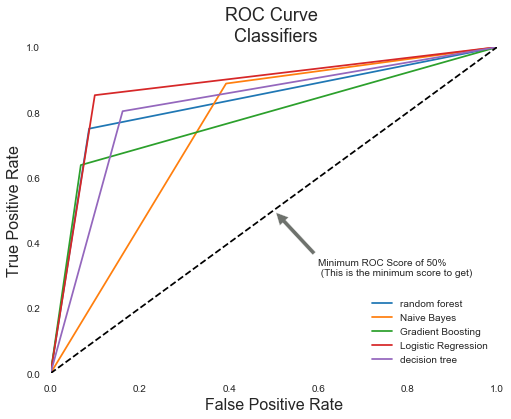

In [123]:
def graph_roc_curve_multiple(rand_fpr, rand_tpr, nav_fpr, nav_tpr,grad_fpr, grad_tpr, log_fpr, log_tpr, dt_fpr, dt_tpr):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve \n Classifiers', fontsize=18)
    plt.plot(rand_fpr, rand_tpr, label='random forest')
    plt.plot(nav_fpr, nav_tpr, label='Naive Bayes')
    plt.plot(grad_fpr, grad_tpr, label='Gradient Boosting')
    plt.plot(log_fpr, log_tpr, label='Logistic Regression')
    plt.plot(dt_fpr, dt_tpr, label='decision tree')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(rand_fpr, rand_tpr, nav_fpr, nav_tpr,grad_fpr, grad_tpr, log_fpr, log_tpr, dt_fpr, dt_tpr)
plt.show()

In [124]:
#tfidf with top 100 words

In [125]:
words = []
for k in range(len(corpus)):
    tweet_k = corpus[k].split(" ")
    for m in range(len(tweet_k)):
        words.append(tweet_k[m])
from collections import Counter
counter_obj = Counter(words)
top100 = counter_obj.most_common(1000)
top100words = []
for i in range(len(top100)):
    top100words.append(top100[i][0])

In [126]:
tdftop = df2
lst3 = [value for value in list(tdftop.columns) if value in top100words] 
tdf100 = tdftop[lst3]
tdf100['labelxyz'] = list(ds.label)
tdf_hate = tdf100[tdf100.labelxyz == 1]
tdf_nonhate = tdf100[tdf100.labelxyz == 0]
X_train_hate = tdf_hate.sample(frac=0.9, random_state=0)
X_test_hate = tdf_hate.drop(X_train_hate.index)
X_train_nonhate =  tdf_nonhate.sample(frac=0.406, random_state=0)
X_test_nonhate = tdf_nonhate.drop(X_train_nonhate.index)
X_train_df = pd.concat([X_train_hate, X_train_nonhate], axis = 0)
X_train = X_train_df.drop(['labelxyz'], axis = 1)
y_train = list(X_train_df.labelxyz)
X_test_df = pd.concat([X_test_hate, X_test_nonhate], axis = 0)
X_test = X_test_df.drop(['labelxyz'], axis = 1)
y_test = list(X_test_df.labelxyz)

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
log_reg =  LogisticRegression()

log_reg.fit(X_train, y_train)
tp = []
tn = []
overall_acc = []
for i in range(100):
    threshold = (i+1)/100
    decisions = (log_reg.predict_proba(X_test) >= threshold).astype(int)
    p = []
    for j in range(len(y_test)):
        p.append(1 - decisions[j][0])
    conf = confusion_matrix(y_test,p)
    tp.append(conf[0][0]/(conf[0][0] + conf[0][1]))
    tn.append(conf[1][1]/(conf[1][1] + conf[1][0]))
    overall_acc.append((conf[0][0] + conf[1][1])/len(y_test))

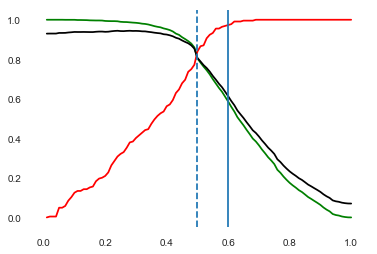

In [128]:
import matplotlib.pyplot as plt
import numpy as np
thresh = list(np.linspace(0.01,1,100))
plt.plot(thresh,tp,color='green')
plt.plot(thresh, tn, color='red')
plt.plot(thresh, overall_acc, color='black')
plt.axvline(0.6)
plt.axvline(0.5, linestyle='dashed')

In [129]:
#other models
from sklearn.metrics import accuracy_score
nav_clf.fit(X_train, y_train)
predict_nav = nav_clf.predict(X_test)
print('naive bayes')
print(accuracy_score(y_test, predict_nav))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predict_nav))

rand_clf = RandomForestClassifier()
rand_clf.fit(X_train, y_train)
predict = rand_clf.predict(X_test)
print('random forest')
print(accuracy_score(y_test, predict))
print(confusion_matrix(y_test, predict))

dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
predict_dt = dt_clf.predict(X_test)
print('decision tree')
print(accuracy_score(y_test, predict_dt))
print(confusion_matrix(y_test, predict_nav))

from sklearn.ensemble import GradientBoostingClassifier
grad_clf = GradientBoostingClassifier()
grad_clf.fit(X_train, y_train)
print('gradient boosting')
predict_grad = grad_clf.predict(X_test)
print(accuracy_score(y_test, predict_grad))
print(confusion_matrix(y_test, predict_grad))

naive bayes
0.5858395989974937
[[1659 1309]
 [  13  211]]
random forest
0.8283208020050126
[[2471  497]
 [  51  173]]
decision tree
0.743734335839599
[[1659 1309]
 [  13  211]]
gradient boosting
0.9113408521303258
[[2770  198]
 [  85  139]]


In [130]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
predict_log = log_reg.predict(X_test)
accuracy_score(y_test, predict_log)

0.806704260651629

In [131]:
print(confusion_matrix(y_test, predict_log))

[[2387  581]
 [  36  188]]


In [132]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

print('Logistic Regression Score: ', roc_auc_score(y_test, p))
print('Naive Bayes Score: ', roc_auc_score(y_test, predict_nav))
print('Random Forest Score: ', roc_auc_score(y_test, predict))
print('Decision Tree Score: ', roc_auc_score(y_test, predict_dt))
print('Grad Boosting Score: ', roc_auc_score(y_test, predict_grad))

Logistic Regression Score:  0.5
Naive Bayes Score:  0.7504632749326146
Random Forest Score:  0.8024342991913747
Decision Tree Score:  0.7982227088948787
Grad Boosting Score:  0.7769120619946093


In [133]:
from sklearn.metrics import roc_curve

log_fpr, log_tpr, threshold = roc_curve(y_test,p)
nav_fpr, nav_tpr, threshold = roc_curve(y_test, predict_nav)
rand_fpr, rand_tpr, thresold = roc_curve(y_test, predict)
dt_fpr, dt_tpr, threshold = roc_curve(y_test, predict_dt)
grad_fpr, grad_tpr, threshold = roc_curve(y_test, predict_grad)

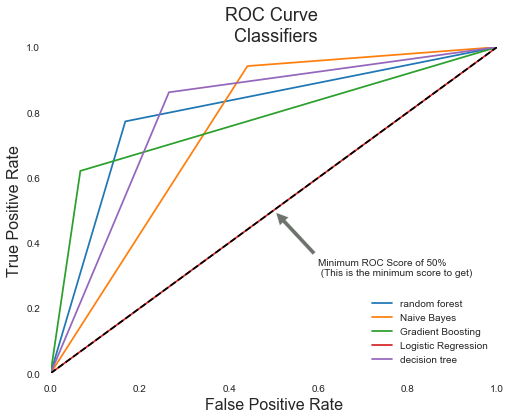

In [134]:
def graph_roc_curve_multiple(rand_fpr, rand_tpr, nav_fpr, nav_tpr,grad_fpr, grad_tpr, log_fpr, log_tpr, dt_fpr, dt_tpr):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve \n Classifiers', fontsize=18)
    plt.plot(rand_fpr, rand_tpr, label='random forest')
    plt.plot(nav_fpr, nav_tpr, label='Naive Bayes')
    plt.plot(grad_fpr, grad_tpr, label='Gradient Boosting')
    plt.plot(log_fpr, log_tpr, label='Logistic Regression')
    plt.plot(dt_fpr, dt_tpr, label='decision tree')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(rand_fpr, rand_tpr, nav_fpr, nav_tpr,grad_fpr, grad_tpr, log_fpr, log_tpr, dt_fpr, dt_tpr)
plt.show()